# Audio Processing Notebook

The goal of this notebook is to process audio files from voice recordings.
First use transcript files to select time points were the participant is speaking and slice audio file to get only the parts were he is talking.

Then, we use those new audio files to create 10 seconds fragments from those recordings.

In [1]:
#Import required libraries

# !pip install pydub
from pydub import AudioSegment
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

# !pip install librosa
import librosa
import librosa.display


/Users/bruno/Documents/PsyVox/voice-depression/venv/lib/python3.10/site-packages/pydub/utils.py:170: RuntimeWarning: Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work
  warn("Couldn't find ffmpeg or avconv - defaulting to ffmpeg, but may not work", RuntimeWarning)


### Create Functions to read transcript files and slice audio files

In [2]:
def transcript_times(patientId):
    transcripts = pd.read_table("../TRANSCRIPT/{}_TRANSCRIPT.csv".format(patientId)) # Store transcript file in a DataFrame
    patient_times = transcripts.loc[transcripts['speaker'] == 'Participant'] #We keep the rows corresponding to the participant (patient)
    #We drop the columns for speaker and value (words spoken) and we keep just start and end time of participant speech
    patient_times.drop(index = patient_times.loc[patient_times["value"] == 'scrubbed_entry'].index, inplace = True) # we also drop scrubbed entries
    patient_times.drop(['speaker','value'], axis = 1)
    return patient_times

def slice_audio_file(patientId, patient_times):
    input_audio_file = "../AUDIO/{}_AUDIO.wav".format(patientId)  #Set the input folder and name of file to import the sliced audio
    output_slice_folder = "audio_sliced/{}.wav".format(patientId) #Set the output folder and name of file to export the sliced audio
    sound = AudioSegment.from_file(input_audio_file, format="wav") #Store the data from the audio file
    sliced = AudioSegment.empty() #create empty audio
    for i in range(patient_times.shape[0]):
        start, end = patient_times.iloc[i]['start_time'], patient_times.iloc[i]['stop_time'] #Set the start and end time for the interval to be cut
        sound2 = sound[start*1000:end*1000] #store fragment in new sound
        sliced = sliced.append(sound2, crossfade=0) #join fragment with previous ones
    sliced.export(output_slice_folder, format="wav") #export new audio of joint fragments
    return

### Slice all audio files in participants list

In [3]:
for patientId in range(300, 493):
    if (patientId == 342 or patientId == 394 or patientId == 398 or patientId == 460):
        print("no patient") #for participants that have no transcript file, print no patient
    else:
        patient_times = transcript_times(patientId) #For every participant, get times were he speaks from transcript files 
        slice_audio_file(patientId, patient_times) #Create new audio with just the parts were participant speaks and export audio


<ipython-input-2-c99c587f4a0e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  patient_times.drop(index = patient_times.loc[patient_times["value"] == 'scrubbed_entry'].index, inplace = True)


In [4]:
#Check number of files created
audio_fpath = 'audio_sliced/'
audio_clips = os.listdir(audio_fpath)
print("No. of .wav files in audio folder = ",len(audio_clips))

No. of .wav files in audio folder =  2


## Visualization of new audio files

<class 'numpy.ndarray'> <class 'int'>
(19989117,) 44100


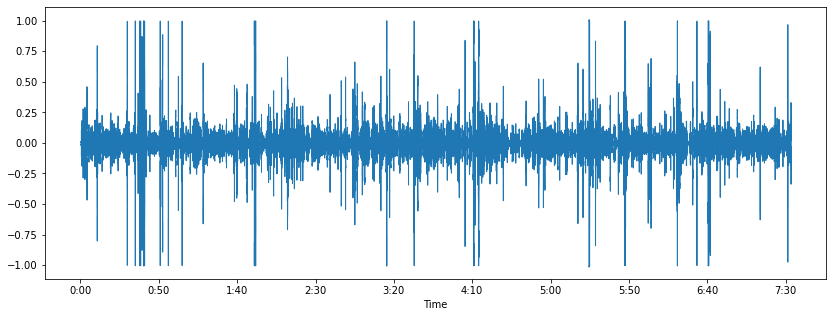

In [5]:
x, sr = librosa.load(audio_fpath+audio_clips[0], sr=44100)
print(type(x), type(sr))
print(x.shape, sr) #print audio time series and sample rate

#print waveshape of one example
plt.figure(figsize=(14, 5))
librosa.display.waveshow(x, sr=sr) #check no silences are observed in the wave

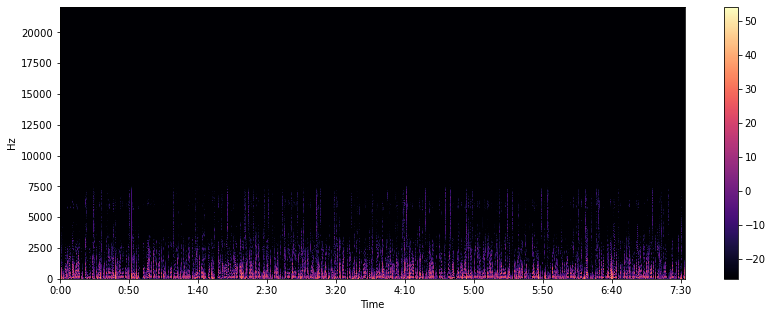

In [6]:
#Visualize audio file as spectrogram
X = librosa.stft(x)
Xdb = librosa.amplitude_to_db(abs(X))
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sr, x_axis='time', y_axis='hz')
plt.colorbar()

# Now create 10 seconds fragments from new audio file sliced for each participant

In [10]:
def slice_audio_file_10s(patientId):
    input_audio_file = "audio_sliced/{}.wav".format(patientId)
    output_slice_folder = "audio_sliced/10s/{}.wav".format(patientId) 
    sound = AudioSegment.from_file(input_audio_file, format="wav")
    for i, chunk in enumerate(sound[::10000]):
        with open("audio_sliced/10s/{}-{}.wav".format(patientId,i), "wb") as f:
            chunk.export(f, format="wav")
    return

for patientId in range(300, 493):
    if (patientId == 342 or patientId == 394 or patientId == 398 or patientId == 460):
        print("no patient")
    else:
        slice_audio_file_10s(patientId)



no patient
no patient
no patient
no patient


### Remove audio files that are less than 10 seconds long

In [20]:
for file in os.listdir('audio_sliced/10s/'):
    sound = AudioSegment.from_file("audio_sliced/10s/{}".format(file))
    if sound.duration_seconds < 10.0:
        os.remove("audio_sliced/10s/{}".format(file))



Check that files are 10 seconds long

In [21]:
for file in os.listdir('audio_sliced/10s/'):
    sound = AudioSegment.from_file("audio_sliced/10s/{}".format(file))
    print(sound.duration_seconds)

10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
10.0
